# Machine Learning on Text: Clustering Assignment

In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus.reader.plaintext import PlaintextCorpusReader
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer

<IPython.core.display.Javascript object>

### Ingest the company_profiles data set into a corpus.

In [3]:
path = "company_profiles/"
DOC_PATTERN = r".*\.txt"

corpus = PlaintextCorpusReader(path, DOC_PATTERN)

<IPython.core.display.Javascript object>

### Create a list of documents by extracting the raw text for each fileid in the corpus.

In [5]:
docs_raw = [corpus.raw(file_id) for file_id in corpus.fileids()]


<IPython.core.display.Javascript object>

In [12]:
len(docs_raw)

3558

<IPython.core.display.Javascript object>

### Preprocess the documents, including the steps below.

- Word tokenize the document.
- Lowercase all tokens.
- Lemmatize and stem the tokens.
- Remove stop words and punctuation.

In [9]:
def preprocess(docs):
    # lemmatizer = WordNetLemmatizer()
    stemmer = SnowballStemmer("english")
    preprocessed = []

    for doc in docs:
        tokenized = word_tokenize(doc)

        cleaned = [
            stemmer.stem(token.lower())
            for token in tokenized
            if not token.lower() in stopwords.words("english")
            if token.isalpha()
        ]

        untokenized = " ".join(cleaned)
        preprocessed.append(untokenized)

    return preprocessed

<IPython.core.display.Javascript object>

In [13]:
docs_clean = preprocess(docs_raw)
docs_clean

['agil technolog provid applic focus solut life scienc diagnost appli chemic market worldwid oper three segment life scienc appli market diagnost genom agil crosslab life scienc appli market segment offer liquid chromatographi system compon liquid chromatographi mass spectrometri system gas chromatographi system compon gas chromatographi mass spectrometri system induct coupl plasma mass spectrometri instrument atom absorpt instrument microwav emiss spectrometri instrument induct coupl plasma optic emiss spectrometri instrument raman spectroscopi microfluid base autom electrophoresi product cell analysi plate base assay laboratori softwar informat system laboratori autom dissolut test vacuum pump measur technolog diagnost genom segment provid reagent instrument softwar consum array dna mutat detect genotyp gene copi number determin identif gene rearrang dna methyl profil gene express profil well sequenc target enrich servic equip focus product synthes oligonucleotid use activ pharmaceut

<IPython.core.display.Javascript object>

### TF-IDF vectorize the preprocessed documents.

In [14]:
vectorizer = TfidfVectorizer()
vectorized = vectorizer.fit_transform(docs_clean)

<IPython.core.display.Javascript object>

### Determine the optimal number of clusters using the Yellowbrick library's KElbow Visualizer and a KMeans clustering algorithm.

C:\Users\dgump\miniconda3\lib\site-packages\yellowbrick\utils\kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\dgump\miniconda3\lib\site-packages\yellowbrick\utils\kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\dgump\miniconda3\lib\site-packages\yellowbrick\cluster\elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\dgump\miniconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarni

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x0000019B706EF1C8>,
                 k=None, locate_elbow=True, metric='silhouette', model=None,
                 timings=True)

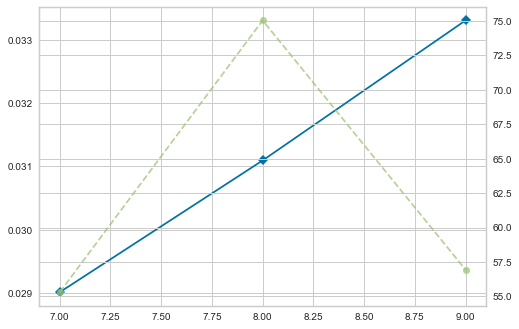

<IPython.core.display.Javascript object>

In [20]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(7, 10), metric="silhouette")

visualizer.fit(vectorized)

### Perform K-Means Clustering using the optimal number of clusters determine in the previous step.

### Perform Agglomerative Clustering using the same number of clusters.

### Choose one of the three topic modeling approaches covered. Cluster into the optimal number of clusters and extract 5 keywords that represent the documents in each cluster.

In [0]:
results = [[(vectorizer.get_feature_names()[i], topic[i]) 
            for i in topic.argsort()[:-num_keywords - 1:-1]] 
           for topic in model.components_]

topics = [[x[0] for x in i] for i in results]
topics
